In [1]:
import pandas as pd
import numpy as np
import math

descriptive=pd.read_parquet('descriptive.gzip') 

In [2]:
import sys
sys.path.insert(1, '../Functions')
from check_missing import check_missing
from Treat_Missing import *

In [3]:
check_missing(descriptive)

The dataframe has 62 columns.
 There are 28 columns that have missing values.
 There are 34 columns that have no missing values.
 
 Here is the list of variable having missing values: 
['issued_date', 'loan_date', 'type_card', 'amount', 'duration', 'payments', 'status', 'unemploymant_rate_95', 'rend_sum', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans', 'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins', 'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'loan_end', 'ac_maturity', 'ratio_crimes_95', 'nr_rtrans', 'trans_date_max']


,# Missing Values,% Missing Values
nr_rtrans,4177,97.4
avg_ncard,4137,96.4
issued_date,4113,95.9
type_card,4113,95.9
avg_ins,3986,92.9
amount,3962,92.4
duration,3962,92.4
payments,3962,92.4
status,3962,92.4
loan_end,3962,92.4


In [4]:
descriptive.columns

Index(['client_id', 'disp_id', 'account_id', 'district_id_cli',
       'district_id_ac', 'ac_date', 'birth_date', 'issued_date', 'loan_date',
       'type_disp', 'type_card', 'sex', 'frequency', 'amount', 'duration',
       'payments', 'card', 'loan', 'nb_prod', 'status', 'name', 'region',
       'no_inhabitants', 'no_cities', 'ratio_urban_inhabitants',
       'average_salary', 'unemploymant_rate_95', 'unemploymant_rate_96',
       'no_enterpreneurs_per_1000_inhabitants', 'dif_district', 'rend_sum',
       'max_date', 'meses_trans', 'avg_wage_trans', 'fout_sum',
       'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans',
       'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins',
       'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee',
       'Age', 'loan_end', 'ac_maturity', 'Nb_muni', 'ratio_mun_499',
       'ratio_mun_500_1999', 'ratio_mun_2000_9999', 'ratio_mun_10000',
       'ratio_crimes_95', 'ratio_crimes_96', 'risk_trans', 'nr_rtrans',


In [5]:
descriptive.loc[descriptive.name=='Jesenik'].shape

(44, 62)

In [6]:
#Os missings são todos do distrito Jesenik (nas duas variáveis)
descriptive.loc[descriptive.unemploymant_rate_95.isnull(),['name','region']].head()

,name,region
174,Jesenik,north Moravia
175,Jesenik,north Moravia
218,Jesenik,north Moravia
312,Jesenik,north Moravia
390,Jesenik,north Moravia


In [7]:
#med_un_region=descriptive.loc[descriptive.region=='north Moravia','unemploymant_rate_95'].median()
un_jes=descriptive.loc[descriptive.name=='Jesenik','unemploymant_rate_96'][174]

In [8]:
#med_cr_region=descriptive.loc[descriptive.region=='north Moravia','ratio_crimes_95'].median()
cr_jes=descriptive.loc[descriptive.name=='Jesenik','ratio_crimes_96'][174]

In [9]:
#tratar missings
cat=['type_card'] 
num_0=['rend_sum','avg_wage_trans', 'fout_sum', 'avg_fout_trans', 
     'balance_sum', 'avg_balance', 'avg_nr_ntrans',
    'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins', 'avg_interest', 
     'avg_pension', 'avg_house', 'avg_ncard', 'nr_rtrans',
      'amount', 'duration', 'payments']
num_un=['unemploymant_rate_95']
num_cr=['ratio_crimes_95']

Treat_Missing(df=descriptive,var=[cat,num_0,num_un,num_cr],values=['Missing',0,un_jes,cr_jes])

'Finished.'

In [10]:
#tratar segundo tit
descriptive.loc[descriptive.type_disp=='DISPONENT', num_0]=np.nan
descriptive.loc[descriptive.type_disp=='DISPONENT', cat]=np.nan
descriptive.loc[descriptive.type_disp=='DISPONENT', num_un]=np.nan
descriptive.loc[descriptive.type_disp=='DISPONENT', num_cr]=np.nan

In [11]:
descriptive.drop(['issued_date','trans_date_max','loan_end'],axis=1,inplace=True)

In [12]:
#missings (2º tit)
check_missing(descriptive)

The dataframe has 59 columns.
 There are 25 columns that have missing values.
 There are 34 columns that have no missing values.
 
 Here is the list of variable having missing values: 
['loan_date', 'type_card', 'amount', 'duration', 'payments', 'status', 'unemploymant_rate_95', 'rend_sum', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans', 'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins', 'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'ac_maturity', 'ratio_crimes_95', 'nr_rtrans']


,# Missing Values,% Missing Values
loan_date,3962,92.4
status,3962,92.4
avg_nr_ntrans,688,16.0
ratio_crimes_95,688,16.0
ac_maturity,688,16.0
avg_ncard,688,16.0
avg_house,688,16.0
avg_pension,688,16.0
avg_interest,688,16.0
avg_ins,688,16.0


In [13]:
from sklearn.cluster import KMeans

In [14]:
stit=descriptive.loc[descriptive.type_disp!='OWNER','account_id'].unique()
descriptive.loc[descriptive.account_id.isin(stit),'2tit']=1
descriptive.loc[~descriptive.account_id.isin(stit),'2tit']=0

In [15]:
descriptive.columns

Index(['client_id', 'disp_id', 'account_id', 'district_id_cli',
       'district_id_ac', 'ac_date', 'birth_date', 'loan_date', 'type_disp',
       'type_card', 'sex', 'frequency', 'amount', 'duration', 'payments',
       'card', 'loan', 'nb_prod', 'status', 'name', 'region', 'no_inhabitants',
       'no_cities', 'ratio_urban_inhabitants', 'average_salary',
       'unemploymant_rate_95', 'unemploymant_rate_96',
       'no_enterpreneurs_per_1000_inhabitants', 'dif_district', 'rend_sum',
       'max_date', 'meses_trans', 'avg_wage_trans', 'fout_sum',
       'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans',
       'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins',
       'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee',
       'Age', 'ac_maturity', 'Nb_muni', 'ratio_mun_499', 'ratio_mun_500_1999',
       'ratio_mun_2000_9999', 'ratio_mun_10000', 'ratio_crimes_95',
       'ratio_crimes_96', 'risk_trans', 'nr_rtrans', 'district_new', '2tit'],
  

In [16]:
clust=descriptive.drop(['client_id', 'disp_id', 'account_id', 'district_id_cli',
       'district_id_ac', 'ac_date', 'birth_date','status', 'name','max_date','type_disp','loan_date'],axis=1)

In [17]:
clust.columns

Index(['type_card', 'sex', 'frequency', 'amount', 'duration', 'payments',
       'card', 'loan', 'nb_prod', 'region', 'no_inhabitants', 'no_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemploymant_rate_95',
       'unemploymant_rate_96', 'no_enterpreneurs_per_1000_inhabitants',
       'dif_district', 'rend_sum', 'meses_trans', 'avg_wage_trans', 'fout_sum',
       'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans',
       'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins',
       'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee',
       'Age', 'ac_maturity', 'Nb_muni', 'ratio_mun_499', 'ratio_mun_500_1999',
       'ratio_mun_2000_9999', 'ratio_mun_10000', 'ratio_crimes_95',
       'ratio_crimes_96', 'risk_trans', 'nr_rtrans', 'district_new', '2tit'],
      dtype='object')

In [18]:
clust.dropna(inplace=True)

In [19]:
clust_socdem=clust[['region', 'no_inhabitants',
       'no_cities', 'ratio_urban_inhabitants', 'average_salary',
       'unemploymant_rate_95', 'unemploymant_rate_96',
       'no_enterpreneurs_per_1000_inhabitants','district_new',
        'Nb_muni', 'ratio_mun_499', 'ratio_mun_500_1999',
       'ratio_mun_2000_9999', 'ratio_mun_10000', 'ratio_crimes_95',
       'ratio_crimes_96','Age','sex']]

In [20]:
clust_binf=clust[['type_card', 'frequency', 'amount', 'duration', 'payments',
       'card', 'loan', 'nb_prod','dif_district', 'rend_sum', 'meses_trans', 'avg_wage_trans', 'fout_sum',
       'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans',
       'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins',
       'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee',
                 'risk_trans', 'nr_rtrans','2tit']]

In [21]:
#CLUSTERING NOS LOAN

In [22]:
clust_socdem=pd.get_dummies(clust_socdem)

In [23]:
clust_binf=pd.get_dummies(clust_binf)

In [24]:
len(clust_socdem.columns)

33

In [25]:
len(clust_binf.columns)

34

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import calinski_harabasz_score
socdem = MinMaxScaler().fit_transform(clust_socdem)

Text(0, 0.5, '$J(C_k)$')

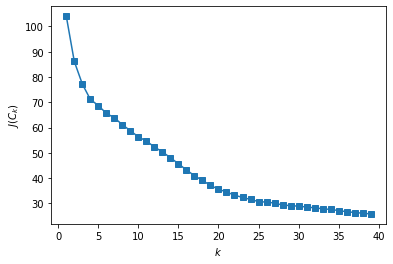

In [27]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(socdem)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 40), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [28]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(socdem)

In [29]:
print(kmeans.cluster_centers_)

[[ 6.66632799e-02  5.58003442e-01  4.23189191e-01  1.96398322e-01
   4.27377107e-01  3.93275731e-01  3.85530161e-01  4.20719028e-01
   6.36233276e-01  5.03156869e-01  2.03893821e-01  3.70843945e-02
   2.65107209e-01  2.04109480e-01  4.47696669e-01  3.10862447e-15
   1.56970740e-01  1.54216867e-01  1.31497418e-01  1.71428571e-01
   1.02925990e-01  1.79345955e-01  1.03614458e-01 -3.95516953e-16
   3.10862447e-15  3.95869191e-02  1.37693632e-02  1.37693632e-02
   1.26287869e-15  9.32874355e-01 -7.89299182e-16  4.94664372e-01
   5.05335628e-01]
 [ 7.12097524e-01  5.66213743e-15  1.00000000e+00  8.14058186e-01
   1.58663777e-01  1.41178390e-01  7.91364986e-01 -4.44089210e-15
   2.99760217e-15  9.43689571e-16 -2.49800181e-15  1.00000000e+00
   8.67477175e-01  8.18023427e-01  4.31449911e-01  6.18364419e-01
  -2.16493490e-15  9.71445147e-17 -2.63677968e-16  1.79340029e-01
  -8.60422844e-16  1.50645624e-01  5.16499283e-02  1.50645624e-01
   6.18364419e-01 -2.63677968e-16  8.67361738e-18  8.6736

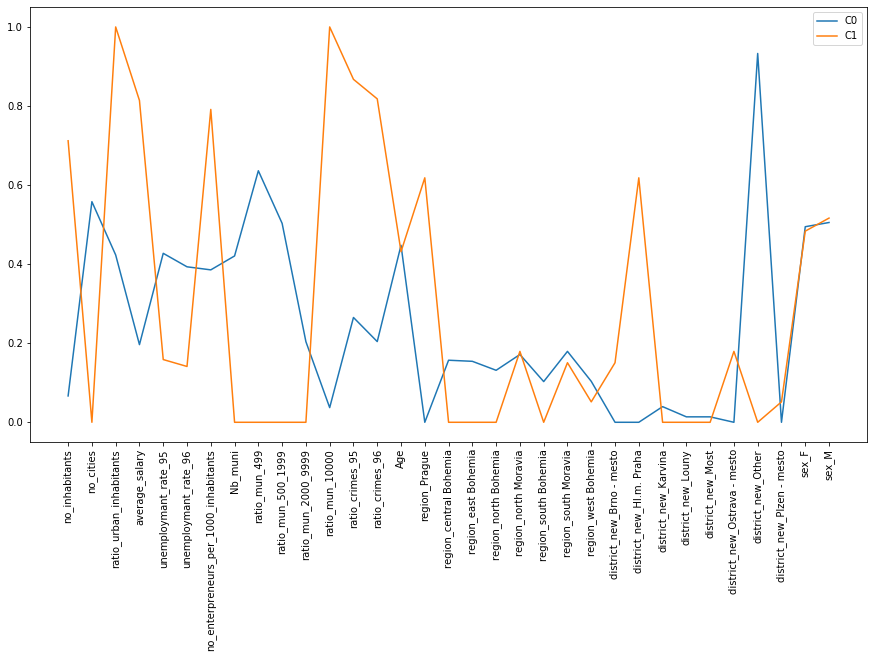

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(clust_socdem.columns, kmeans.cluster_centers_[0], label='C0')
ax.plot(clust_socdem.columns, kmeans.cluster_centers_[1], label='C1')
legend = ax.legend(loc='upper right')
_=plt.xticks(rotation=90)

In [31]:
y_km = kmeans.fit_predict(clust_socdem)

In [32]:
y_km

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
clust_socdem.columns

Index(['no_inhabitants', 'no_cities', 'ratio_urban_inhabitants',
       'average_salary', 'unemploymant_rate_95', 'unemploymant_rate_96',
       'no_enterpreneurs_per_1000_inhabitants', 'Nb_muni', 'ratio_mun_499',
       'ratio_mun_500_1999', 'ratio_mun_2000_9999', 'ratio_mun_10000',
       'ratio_crimes_95', 'ratio_crimes_96', 'Age', 'region_Prague',
       'region_central Bohemia', 'region_east Bohemia', 'region_north Bohemia',
       'region_north Moravia', 'region_south Bohemia', 'region_south Moravia',
       'region_west Bohemia', 'district_new_Brno - mesto',
       'district_new_Hl.m. Praha', 'district_new_Karvina',
       'district_new_Louny', 'district_new_Most',
       'district_new_Ostrava - mesto', 'district_new_Other',
       'district_new_Plzen - mesto', 'sex_F', 'sex_M'],
      dtype='object')

In [34]:
clust_socdem.loc[y_km==1,'district_new_Hl.m. Praha'].sum()

431

In [35]:
clust_socdem.loc[clust_socdem['district_new_Hl.m. Praha']==1]

,no_inhabitants,no_cities,ratio_urban_inhabitants,average_salary,unemploymant_rate_95,unemploymant_rate_96,no_enterpreneurs_per_1000_inhabitants,Nb_muni,ratio_mun_499,ratio_mun_500_1999,...,district_new_Brno - mesto,district_new_Hl.m. Praha,district_new_Karvina,district_new_Louny,district_new_Most,district_new_Ostrava - mesto,district_new_Other,district_new_Plzen - mesto,sex_F,sex_M
1,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
16,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
39,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
45,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
54,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4244,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4254,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4263,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [36]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

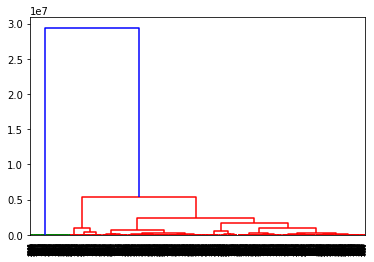

In [37]:
dendrogram = sch.dendrogram(sch.linkage(clust_socdem, method='ward'))

hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(clust_socdem)

In [38]:
clust_socdem.loc[y_hc==1]

,no_inhabitants,no_cities,ratio_urban_inhabitants,average_salary,unemploymant_rate_95,unemploymant_rate_96,no_enterpreneurs_per_1000_inhabitants,Nb_muni,ratio_mun_499,ratio_mun_500_1999,...,district_new_Brno - mesto,district_new_Hl.m. Praha,district_new_Karvina,district_new_Louny,district_new_Most,district_new_Ostrava - mesto,district_new_Other,district_new_Plzen - mesto,sex_F,sex_M
1,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
16,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
39,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
45,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
54,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4244,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4254,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4263,1204953,1,100.0,12541,0.29,0.43,167,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
# info banco

In [40]:
binf = MinMaxScaler().fit_transform(clust_binf)

Text(0, 0.5, '$J(C_k)$')

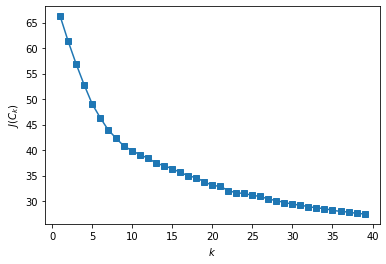

In [41]:
inertia = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(binf)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 40), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [42]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(binf)

In [43]:
y_km = kmeans.fit_predict(clust_binf)
print('C0:',(y_km==0).sum(),', C1:',(y_km==1).sum(),', C2:',(y_km==2).sum(),', C3:',(y_km==3).sum())

C0: 2663 , C1: 60 , C2: 520 , C3: 359


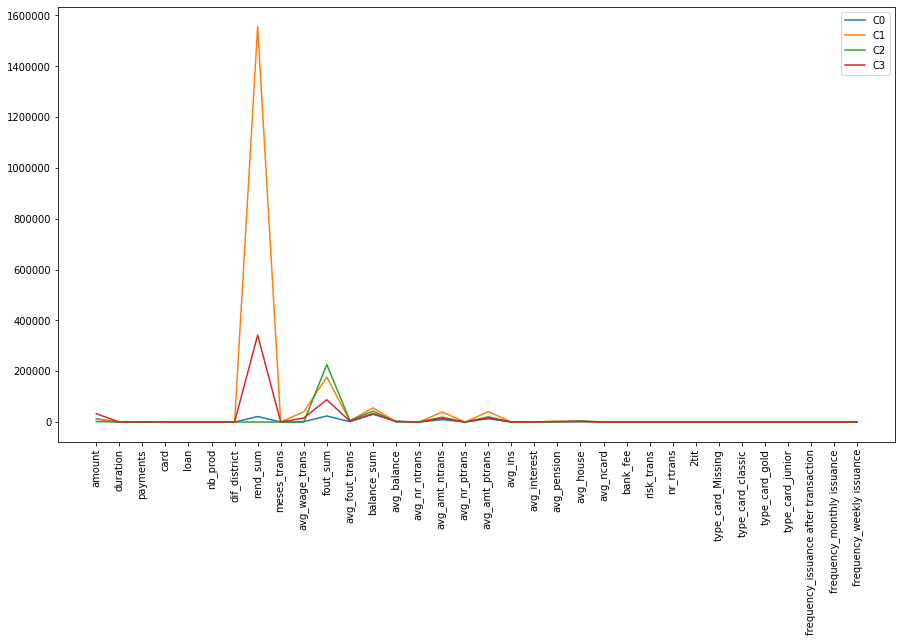

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(clust_binf.columns, kmeans.cluster_centers_[0], label='C0')
ax.plot(clust_binf.columns, kmeans.cluster_centers_[1], label='C1')
ax.plot(clust_binf.columns, kmeans.cluster_centers_[2], label='C2')
ax.plot(clust_binf.columns, kmeans.cluster_centers_[3], label='C3')
#ax.plot(clust_binf.columns, kmeans.cluster_centers_[4], label='C4')
legend = ax.legend(loc='upper right')
_=plt.xticks(rotation=90)

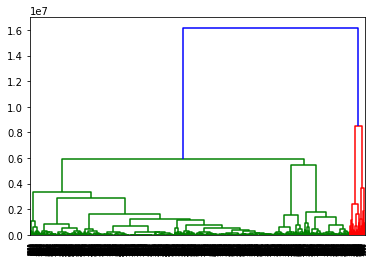

In [45]:
dendrogram = sch.dendrogram(sch.linkage(clust_binf, method='ward'))

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(clust_binf)

In [46]:
y_hc

array([3, 0, 3, ..., 2, 3, 2], dtype=int64)

In [47]:
print('C0:',(y_hc==0).sum(),', C1:',(y_hc==1).sum(),', C2:',(y_hc==2).sum(),', C3:',(y_hc==3).sum())

C0: 822 , C1: 53 , C2: 107 , C3: 2620


## Clustering nos loan
#### uso das variáveis importantes no RFE

In [48]:
pred1=descriptive[['account_id', 'loan_date', 'status', 'amount', 'payments', 'avg_fout_trans', 'balance_sum', 'avg_balance',
       'avg_nr_ptrans', 'avg_amt_ptrans', 'risk_trans', 'nr_rtrans']]

#### retirar variáveis desinteressantes

In [49]:
pred1=descriptive[['account_id', 'loan_date', 'status', 'payments', 'avg_fout_trans', 'balance_sum', 
       'avg_amt_ptrans', 'risk_trans', 'nr_rtrans']]

In [50]:
clust_pred=pred1.loc[(pred1.payments>0)&(pred1.loan_date<'1996-01-01')]

clust_pred.drop(['account_id', 'loan_date', 'status'],axis=1,inplace=True)

C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
clust_pred

,payments,avg_fout_trans,balance_sum,avg_amt_ptrans,risk_trans,nr_rtrans
1,3373.0,3310.690909,27840.7,20789.572727,0.0,0.0
160,8734.0,2461.514286,28015.4,16235.142857,0.0,0.0
265,2577.0,2970.800000,25187.2,23805.566667,0.0,0.0
311,1683.0,3289.830769,47137.8,15977.353846,0.0,0.0
314,7801.0,10.305882,50832.2,29537.858824,1.0,2.0
...,...,...,...,...,...,...
4267,1445.0,9.733333,38665.1,13634.073333,0.0,0.0
4271,3004.0,3167.066667,21921.4,42991.666667,0.0,0.0
4274,5073.0,0.000000,45660.9,15332.180000,0.0,0.0
4278,4399.0,1388.422222,21029.0,10042.755556,0.0,0.0


In [59]:
minmax = MinMaxScaler().fit(clust_pred)
pred = minmax.transform(clust_pred)

Text(0, 0.5, '$J(C_k)$')

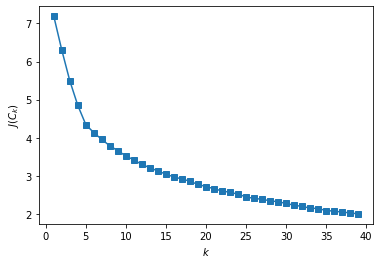

In [60]:
inertia = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(pred)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 40), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [61]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(pred)

In [62]:
y_km = kmeans.predict(pred)
print('C0:',(y_km==0).sum(),', C1:',(y_km==1).sum(),', C2:',(y_km==2).sum(),', C3:',(y_km==3).sum(),', C4:',(y_km==4).sum())

C0: 46 , C1: 35 , C2: 34 , C3: 10 , C4: 86


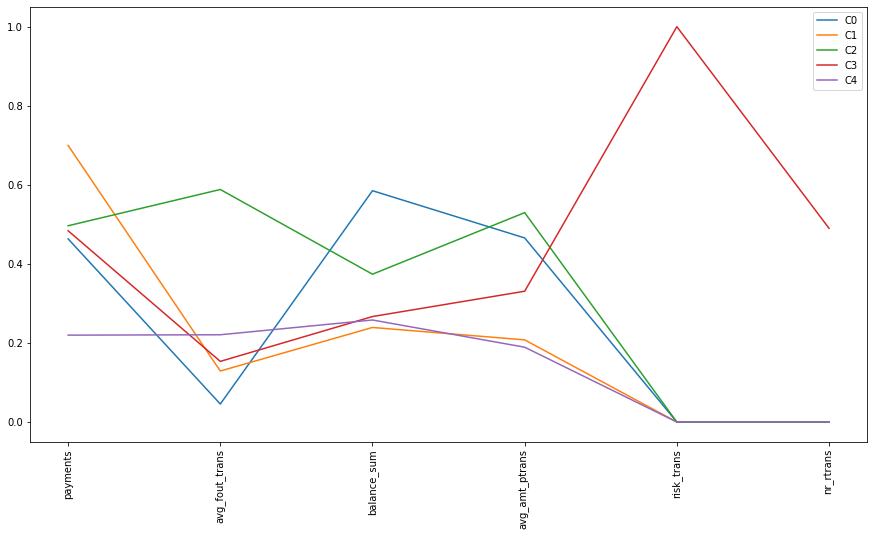

In [63]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(clust_pred.columns, kmeans.cluster_centers_[0], label='C0')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[1], label='C1')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[2], label='C2')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[3], label='C3')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[4], label='C4')
legend = ax.legend(loc='upper right')
_=plt.xticks(rotation=90)

plt.savefig('clustering.png')

In [64]:
clust_pred2=pred1.loc[(pred1.payments>0)&(pred1.loan_date>='1996-01-01')]

clust_pred2.drop(['account_id', 'loan_date' , 'status'],axis=1,inplace=True)

C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
pred2 = minmax.transform(clust_pred2)

y_km2 = kmeans.predict(pred2)

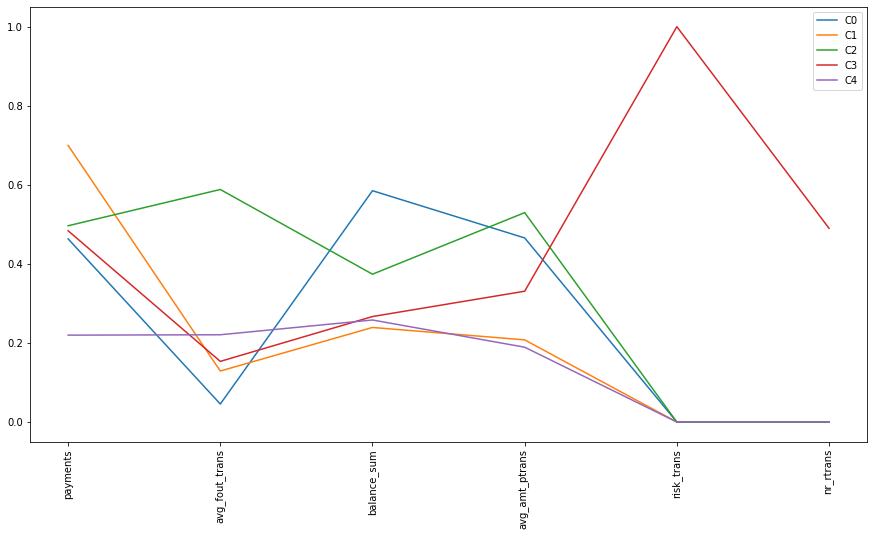

In [66]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(clust_pred.columns, kmeans.cluster_centers_[0], label='C0')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[1], label='C1')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[2], label='C2')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[3], label='C3')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[4], label='C4')
legend = ax.legend(loc='upper right')
_=plt.xticks(rotation=90)

In [67]:
predf_tre=pred1.loc[(pred1.payments>0)&(pred1.loan_date<'1996-01-01')]

predf_tre['cluster']=y_km

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
predf_val=pred1.loc[(pred1.payments>0)&(pred1.loan_date>='1996-01-01')]

predf_val['cluster']=y_km2

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
pt_tre=pd.pivot_table(predf_tre,index='cluster',columns='status',values='payments',aggfunc='count')
pt_tre[1]/pt_tre.sum(axis=1)

cluster
0    0.086957
1    0.285714
2    0.088235
3    0.900000
4    0.046512
dtype: float64

In [70]:
pt_val=pd.pivot_table(predf_val,index='cluster',columns='status',values='payments',aggfunc='count')
pt_val[1]/pt_val.sum(axis=1)

cluster
0    0.107143
1    0.105263
2    0.125000
3    0.800000
4    0.102041
dtype: float64

In [71]:
#tratar risco
predf_tre['cluster']=predf_tre['cluster'].replace({0:0,1:0,2:0,4:0,3:1})
predf_val['cluster']=predf_val['cluster'].replace({0:0,1:0,2:0,4:0,3:1})

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
predf_tre.cluster.value_counts()

0    201
1     10
Name: cluster, dtype: int64

In [73]:
pt_tre=pd.pivot_table(predf_tre,index='cluster',columns='status',values='payments',aggfunc='count')
pt_tre[1]/pt_tre.sum(axis=1)

cluster
0    0.104478
1    0.900000
dtype: float64

In [74]:
pt_val=pd.pivot_table(predf_val,index='cluster',columns='status',values='payments',aggfunc='count')
pt_val[1]/pt_val.sum(axis=1)

cluster
0    0.107143
1    0.800000
dtype: float64

In [75]:
predf_tre[['account_id','cluster']].to_csv('cluster_treino1.csv',index=False)
predf_val[['account_id','cluster']].to_csv('cluster_teste1.csv',index=False)

### sem ano 93

In [87]:
clust_pred=pred1.loc[(pred1.payments>0)&(pred1.loan_date<'1996-01-01')&(pred1.loan_date>='1994-01-01')]

clust_pred.drop(['account_id', 'loan_date', 'status'],axis=1,inplace=True)

C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
minmax = MinMaxScaler().fit(clust_pred)
pred = minmax.transform(clust_pred)

Text(0, 0.5, '$J(C_k)$')

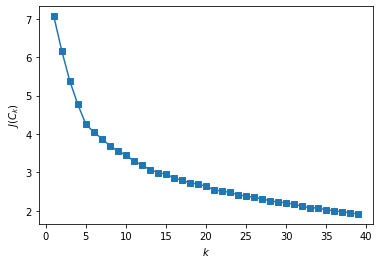

In [89]:
inertia = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(pred)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 40), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [95]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(pred)

In [96]:
y_km = kmeans.predict(pred)
print('C0:',(y_km==0).sum(),', C1:',(y_km==1).sum(),', C2:',(y_km==2).sum(),', C3:',(y_km==3).sum(),', C4:',(y_km==4).sum())

C0: 76 , C1: 10 , C2: 38 , C3: 35 , C4: 32


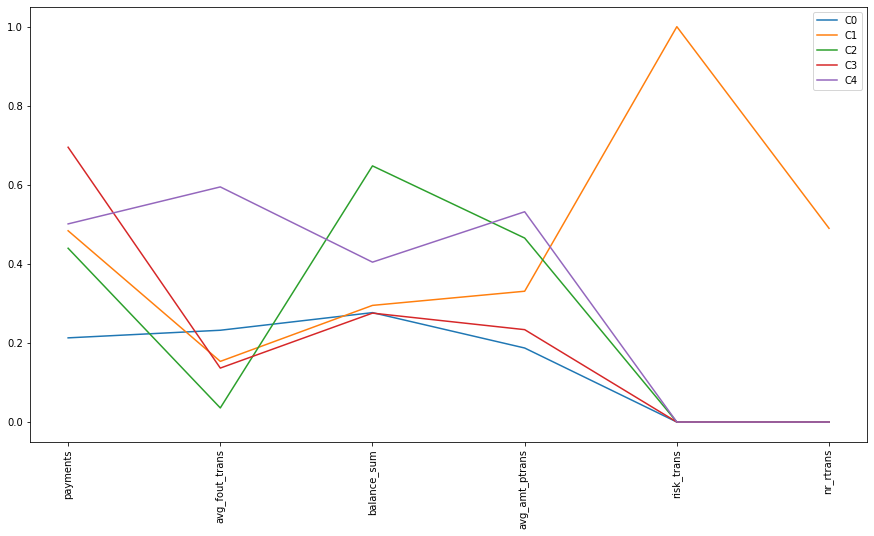

In [97]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(clust_pred.columns, kmeans.cluster_centers_[0], label='C0')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[1], label='C1')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[2], label='C2')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[3], label='C3')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[4], label='C4')
legend = ax.legend(loc='upper right')
_=plt.xticks(rotation=90)

In [98]:
clust_pred2=pred1.loc[(pred1.payments>0)&(pred1.loan_date>='1996-01-01')]

clust_pred2.drop(['account_id', 'loan_date' , 'status'],axis=1,inplace=True)

C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
pred2 = minmax.transform(clust_pred2)

y_km2 = kmeans.predict(pred2)

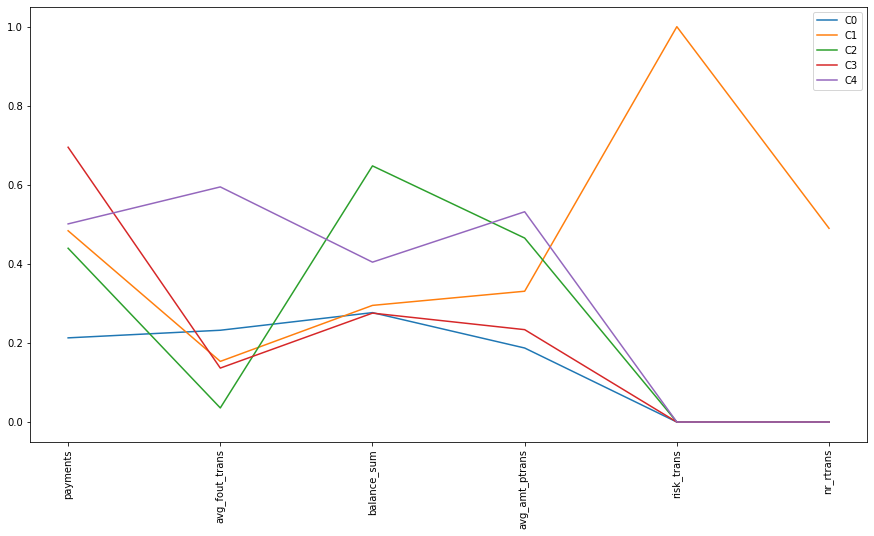

In [100]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(clust_pred.columns, kmeans.cluster_centers_[0], label='C0')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[1], label='C1')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[2], label='C2')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[3], label='C3')
ax.plot(clust_pred.columns, kmeans.cluster_centers_[4], label='C4')
legend = ax.legend(loc='upper right')
_=plt.xticks(rotation=90)

In [101]:
predf_tre=pred1.loc[(pred1.payments>0)&(pred1.loan_date<'1996-01-01')&(pred1.loan_date>='1994-01-01')]

predf_tre['cluster']=y_km

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
predf_val=pred1.loc[(pred1.payments>0)&(pred1.loan_date>='1996-01-01')]

predf_val['cluster']=y_km2

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
pt_tre=pd.pivot_table(predf_tre,index='cluster',columns='status',values='payments',aggfunc='count')
pt_tre[1]/pt_tre.sum(axis=1)

cluster
0    0.039474
1    0.900000
2    0.026316
3    0.285714
4    0.093750
dtype: float64

In [104]:
pt_val=pd.pivot_table(predf_val,index='cluster',columns='status',values='payments',aggfunc='count')
pt_val[1]/pt_val.sum(axis=1)

cluster
0    0.106383
1    0.800000
2    0.103448
3    0.100000
4    0.125000
dtype: float64

In [105]:
#tratar risco
predf_tre['cluster']=predf_tre['cluster'].replace({0:0,2:0,4:0,3:0})
predf_val['cluster']=predf_val['cluster'].replace({0:0,2:0,4:0,3:0})

C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fabio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
predf_tre.cluster.value_counts()

0    181
1     10
Name: cluster, dtype: int64

In [107]:
pt_tre=pd.pivot_table(predf_tre,index='cluster',columns='status',values='payments',aggfunc='count')
pt_tre[1]/pt_tre.sum(axis=1)

cluster
0    0.093923
1    0.900000
dtype: float64

In [108]:
pt_val=pd.pivot_table(predf_val,index='cluster',columns='status',values='payments',aggfunc='count')
pt_val[1]/pt_val.sum(axis=1)

cluster
0    0.107143
1    0.800000
dtype: float64

In [109]:
predf_tre[['account_id','cluster']].to_csv('cluster_treino2.csv',index=False)
predf_val[['account_id','cluster']].to_csv('cluster_teste2.csv',index=False)